# SMC Tests

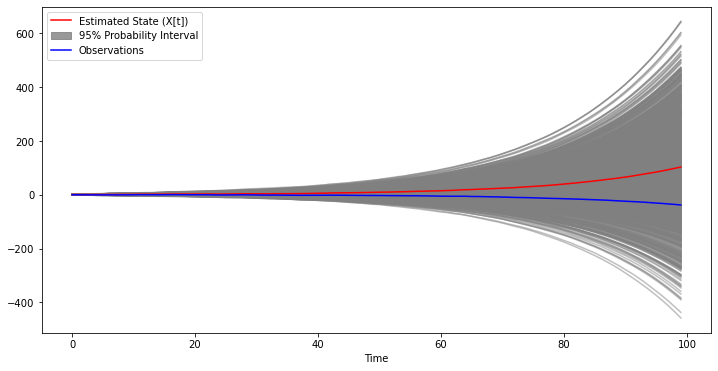

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of particles
num_particles = 1000

# Define the number of time steps
T = 100

# Create a time vector
time = np.arange(T)

# Initialize arrays to store particle values
particles = np.zeros((num_particles, T))

# Initialize particles with random values
particles[:, 0] = np.random.normal(1, 0.4, num_particles)

# Define the state transition parameters
theta = 0.05
state_noise_std = 0.4
obs_noise = 0.2

#Observations
Y = np.zeros(T) 
Y[0]=1
for t in time:
    Y[t] = Y[t-1]*np.exp(theta) + np.random.normal(0, obs_noise) 
    

# Simulate the state transitions and observations
for t in range(1, T):
    particles[:, t] = particles[:, t - 1] * np.exp(theta) + np.random.normal(0,state_noise_std,num_particles)

# Perform SMC (particle filtering)
for t in range(T):
    particles[:, t] = particles[:, t] + Y[t]  # Update particles with observations

# Calculate the estimated state (X[T]) as the mean of the particles
estimated_XT_mean = np.mean(particles, axis=0)

# Calculate the 95% probability interval
lower_bound = np.percentile(particles, 2.5, axis=0)
upper_bound = np.percentile(particles, 97.5, axis=0)

# Plot the estimated state trajectory with confidence intervals
plt.figure(figsize=(12, 6))
for i in range(num_particles):
    plt.plot(time, particles[i, :], alpha=0.5, color='grey')  # Plot particle trajectories

plt.plot(time, estimated_XT_mean, 'r', label='Estimated State (X[t])')
plt.fill_between(time, lower_bound, upper_bound, color='grey', alpha=0.8, label='95% Probability Interval')
plt.plot(time, Y, 'b', label='Observations')
plt.xlabel('Time')
plt.legend()
plt.show()


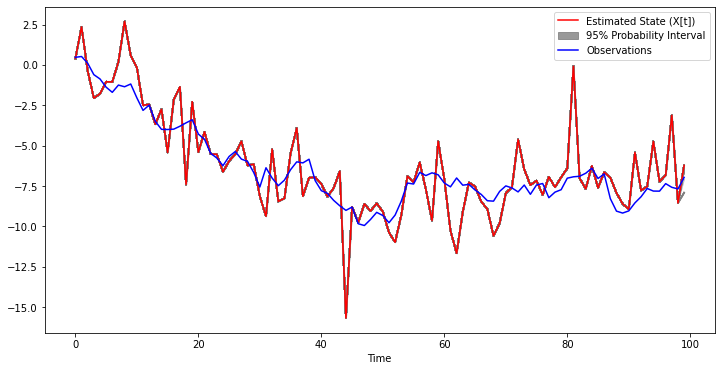

In [115]:
#Bootstrap Filter with Multinomial Resampling

import numpy as np
import matplotlib.pyplot as plt

# Define the number of particles
num_particles = 1000

# Define the number of time steps
T = 100

# Create a time vector
time = np.arange(T)

# Initialize arrays to store particle values
particles = np.zeros((num_particles, T))

# Initialize particles with random values
particles[:, 0] = np.random.normal(1, 0.5, num_particles)

# Define the state transition parameters
theta = 0.02
state_noise_std = 0.5

# Initialize weights for resampling
weights = np.ones(num_particles) / num_particles

# Observations
Y = np.zeros(T)
Y[0] = 1
for t in time:
    Y[t] = Y[t-1] * np.exp(theta) + np.random.normal(0, state_noise_std)

# Simulate the state transitions and update particles
for t in range(1, T):
    particles[:, t] = particles[:, t - 1] * np.exp(theta) + np.random.normal(0, 5,num_particles)

    # Calculate particle likelihood based on the observation at time 
    particle_likelihood = np.exp(-np.abs(Y[t] - particles[:, t]) / state_noise_std)

    # Update weights based on the likelihood
    weights = weights * particle_likelihood

    # Normalize weights with a small epsilon to avoid division by zero
    epsilon = 1e-12
    weights = (weights + epsilon) / (np.sum(weights) + num_particles * epsilon)

    # Resampling step
    resample_indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights)
    particles = particles[resample_indices]

# Calculate the estimated state (X[T]) as the mean of the particles
estimated_XT_mean = np.mean(particles, axis=0)

# Calculate the 95% probability interval
lower_bound = np.percentile(particles, 2.5, axis=0)
upper_bound = np.percentile(particles, 97.5, axis=0)

# Plot the estimated state trajectory with confidence intervals
plt.figure(figsize=(12, 6))
for i in range(num_particles):
    plt.plot(time, particles[i, :], alpha=0.5, color='grey')  # Plot particle trajectories

plt.plot(time, estimated_XT_mean, 'r', label='Estimated State (X[t])')
plt.fill_between(time, lower_bound, upper_bound, color='grey', alpha=0.8, label='95% Probability Interval')
plt.plot(time, Y, 'b', label='Observations')
plt.xlabel('Time')
plt.legend()
plt.show()

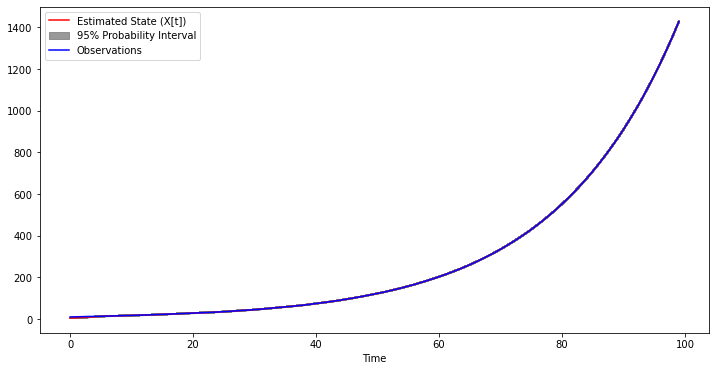

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of particles
num_particles = 1000

# Define the number of time steps
T = 100

# Create a time vector
time = np.arange(T)

# Initialize arrays to store particle values
particles = np.zeros((num_particles, T))

# Initialize particles with random values
particles[:, 0] = np.random.normal(2, 1, num_particles)

# Define the state transition parameters
theta = 0.05
state_noise_std = 0.4
obs_noise = 0.2

# Observations
Y = np.zeros(T)
Y[0] = 10
for t in range(1, T):
    Y[t] = Y[t-1] * np.exp(theta) + np.random.normal(0, obs_noise)

# Perform Bootstrap Filter (Sequential Monte Carlo) with multinomial resampling
for t in range(1, T):
    # State transition step with process noise
    particles[:, t] = particles[:, t - 1] * np.exp(theta) + np.random.normal(0, state_noise_std, num_particles)

    # Likelihood (observation update) with normal likelihood
    particle_likelihood = 1 / np.sqrt(2 * np.pi * obs_noise**2) * \
        np.exp(-0.5 * ((Y[t] - particles[:, t]) / obs_noise)**2)

    # Resampling step (multinomial resampling)
    resample_indices = np.random.choice(np.arange(num_particles), size=num_particles, p=particle_likelihood / np.sum(particle_likelihood))
    particles = particles[resample_indices]

# Calculate the estimated state (X[T]) as the mean of the particles
estimated_XT_mean = np.mean(particles, axis=0)

# Calculate the 95% probability interval
lower_bound = np.percentile(particles, 2.5, axis=0)
upper_bound = np.percentile(particles, 97.5, axis=0)

# Plot the estimated state trajectory with confidence intervals
plt.figure(figsize=(12, 6))
for i in range(num_particles):
    plt.plot(time, particles[i, :], alpha=0.5, color='grey')  # Plot particle trajectories

plt.plot(time, estimated_XT_mean, 'r', label='Estimated State (X[t])')
plt.fill_between(time, lower_bound, upper_bound, color='grey', alpha=0.8, label='95% Probability Interval')
plt.plot(time, Y, 'b', label='Observations')
plt.xlabel('Time')
plt.legend()
plt.show()

In [141]:
Y-

array([  10.        ,   10.72785648,   11.41322636,   12.28069284,
         12.57646346,   13.21564968,   13.99645127,   14.83386493,
         15.67642495,   16.49727903,   17.15046146,   18.26264407,
         19.05421912,   19.99823499,   21.23758043,   22.33491919,
         23.46663556,   24.70773919,   25.86044218,   27.34771736,
         28.48715121,   29.61869396,   30.76103102,   32.18102206,
         33.62362447,   35.25848438,   36.9995577 ,   39.09490877,
         41.14378496,   43.01555368,   45.09342627,   47.40862126,
         50.07551068,   52.76015835,   55.64551064,   58.11974968,
         60.92520171,   63.81013761,   66.92592002,   70.6540748 ,
         74.62032908,   78.07643736,   82.13363269,   86.25109584,
         90.6644004 ,   95.59406725,  100.53499579,  105.76292801,
        111.3527893 ,  117.03631392,  123.09654155,  129.07417407,
        135.77142141,  142.74983831,  149.84288661,  158.0807043 ,
        165.93174097,  174.83941099,  183.90124419,  193.27513